## Proyecto 3. Entrega 3
### Regresion Lineal
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 22305 - Esteban Zambrano 22119

#### Importaciones

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from pipeline import crear_pipeline_regresion_lineal
from error_metrics import calculate_errors, diff_analysis

#### Carga y preparación de datos

In [12]:
# Cargar dataset
df = pd.read_csv("../DataFinal.csv")

# Verificar columnas categóricas
categoricas = ['Grupo de Edad', 'Año']
df[categoricas] = df[categoricas].astype(str)  # Convertir a string para OneHotEncoder

# Eliminar filas con NaN en la variable objetivo
df = df[df['Total Nacimientos'].notna()]

#### Variables predictoras (X) y objetivo (y)

In [13]:
# Variable objetivo
y = df['Total Nacimientos']

# Variables predictoras: eliminar la columna objetivo
X = df.drop(columns=['Total Nacimientos'])

# One-hot encoding para Año y Grupo de Edad
X = pd.get_dummies(X, columns=categoricas, drop_first=True)

#### Divición entre entrenamiento y prueba

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Crearcion y entrenamiento del pipeline

In [15]:
modelo = LinearRegression()
pipeline = crear_pipeline_regresion_lineal(modelo)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

#### Evaluacion del modelo

Regresión Lineal Multivariable:
MAE: 14.72218998743377
MSE: 386.03829532265905
RMSE: 19.647857270518305
R²: 0.9999996790092494


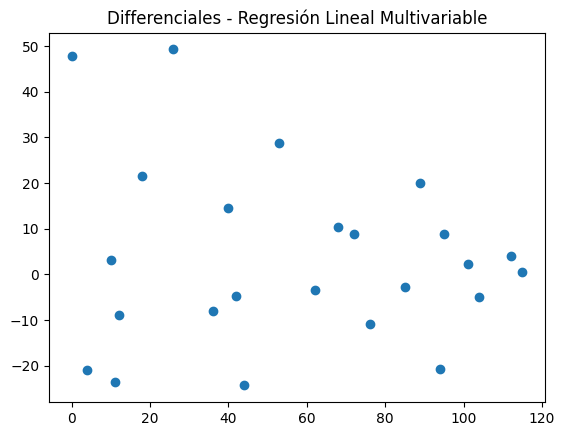

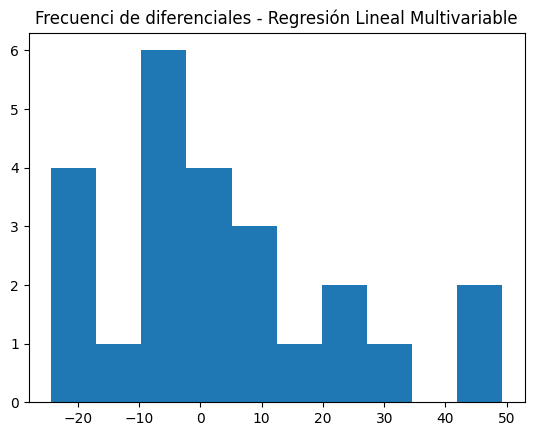

In [16]:
# Predecir
y_pred = pipeline.predict(X_test)

# Calcular métricas
calculate_errors(y_pred, y_test, "Regresión Lineal Multivariable")

# Analizar diferencias
diff_analysis(y_pred, y_test, "Regresión Lineal Multivariable")

Regresión Lineal con subset reducido:
MAE: 1515.0146276068972
MSE: 3923656.1626567505
RMSE: 1980.8220926314282
R²: 0.9967374808351116


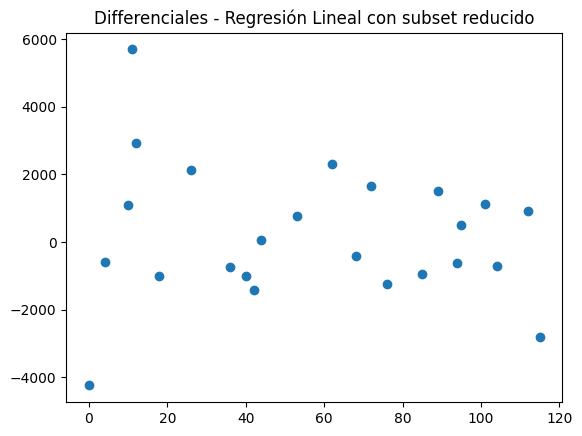

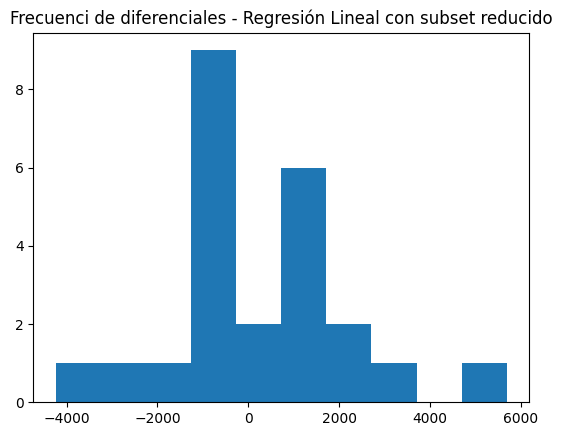

In [11]:
X_reducido = df[['Total VI Victima', 'Promedio de Hijos', 'Total VI Agresor']]
X_reducido = pd.get_dummies(X_reducido.join(df[categoricas].astype(str)), columns=categoricas, drop_first=True)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reducido, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
pipeline = crear_pipeline_regresion_lineal(modelo)
pipeline.fit(X_train_r, y_train_r)

y_pred_r = pipeline.predict(X_test_r)
calculate_errors(y_pred_r, y_test_r, "Regresión Lineal con subset reducido")
diff_analysis(y_pred_r, y_test_r, "Regresión Lineal con subset reducido")

### Prueba sin limpieza previa

In [3]:
import pandas as pd

df_sin_limpieza = pd.read_csv("../DataFinal.csv")

# No convertir tipos ni codificar nada manualmente
# Solo verificar que exista la variable objetivo
df_sin_limpieza = df_sin_limpieza[df_sin_limpieza['Total Nacimientos'].notna()]

#### Separar X e y automáticamente

In [7]:
y_sin_limpieza = df_sin_limpieza['Total Nacimientos']
X_sin_limpieza = df_sin_limpieza.drop(columns=['Total Nacimientos'])

# Selecciona solo las columnas numéricas
X_sin_limpieza = X_sin_limpieza.select_dtypes(include='number')

#### Train-test split

In [8]:
from sklearn.model_selection import train_test_split

X_train_sin, X_test_sin, y_train_sin, y_test_sin = train_test_split(
    X_sin_limpieza, y_sin_limpieza, test_size=0.2, random_state=42
)

#### Entrenar modelo con pipeline

In [9]:
from sklearn.linear_model import LinearRegression
from pipeline import crear_pipeline_regresion_lineal

modelo_sin_limpieza = LinearRegression()
pipeline_sin_limpieza = crear_pipeline_regresion_lineal(modelo_sin_limpieza)
pipeline_sin_limpieza.fit(X_train_sin, y_train_sin)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

#### Evaluación

Regresión sin limpieza:
MAE: 9.59380516870912
MSE: 125.2188715125872
RMSE: 11.190123838125617
R²: 0.9999998958805382


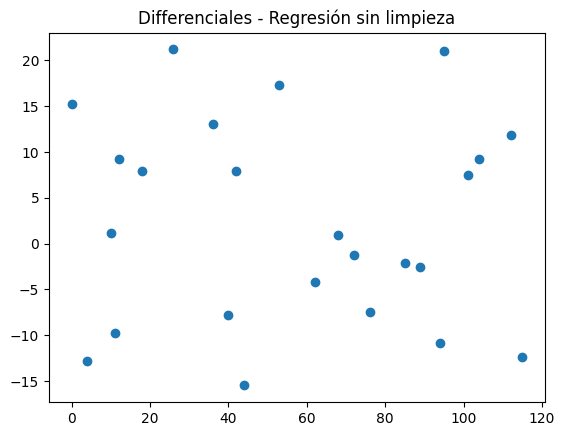

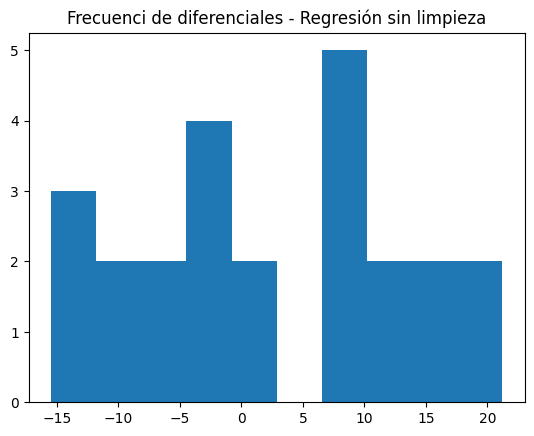

In [10]:
from error_metrics import calculate_errors, diff_analysis

y_pred_sin = pipeline_sin_limpieza.predict(X_test_sin)
calculate_errors(y_pred_sin, y_test_sin, "Regresión sin limpieza")
diff_analysis(y_pred_sin, y_test_sin, "Regresión sin limpieza")